##### Copyright 2024 Google LLC.

### Set environment variables

Set environment variables for `KAGGLE_USERNAME` and `KAGGLE_KEY`.

In [3]:
import os
from google.colab import userdata

# Note: `userdata.get` is a Colab API. If you're not using Colab, set the env
# vars as appropriate for your system.
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')

### Install dependencies

Install Keras and KerasNLP.

In [4]:
# Install Keras 3 last. See https://keras.io/getting_started/ for more details.
!pip install -q -U keras-nlp
!pip install -q -U keras>=3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 36.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatibl

In [5]:
pip install -U "torch"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 7.2 MB/s eta 0:00:00
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

### Select a backend

Keras is a high-level, multi-framework deep learning API designed for simplicity and ease of use. [Keras 3](https://keras.io/keras_3) lets you choose the backend: TensorFlow, JAX, or PyTorch. All three will work for this tutorial.

In [6]:
import os

os.environ["KERAS_BACKEND"] = "torch"  # Or "tensorflow" or "torch".
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "0.9"

### Import packages

Import Keras and KerasNLP.

In [7]:
import keras
import keras_nlp

In [8]:
print(keras.__version__)

3.3.3


In [9]:
tokenizer = keras_nlp.models.GemmaTokenizer.from_preset("gemma_2b_en")
model = keras_nlp.models.GemmaCausalLM.from_preset("gemma_2b_en")

Attaching 'metadata.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Colab notebook...
Attaching 'metadata.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Colab notebook...
Attaching 'tokenizer.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Colab notebook...
Attaching 'tokenizer.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Colab notebook...
Attaching 'assets/tokenizer/vocabulary.spm' from model 'keras/gemma/keras/gemma_2b_en/2' to your Colab notebook...
Attaching 'metadata.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Colab notebook...
Attaching 'metadata.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Colab notebook...
Attaching 'task.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Colab notebook...
Attaching 'config.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Colab notebook...
Attaching 'metadata.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Colab notebook...
Attaching 'metad

`from_preset` instantiates the model from a preset architecture and weights. In the code above, the string `"gemma_2b_en"` specifies the preset architecture: a Gemma model with 2 billion parameters.


Note: A Gemma model with 7 billion parameters is also available. To run the larger model in Colab, you need access to the premium GPUs available in paid plans. Alternatively, you can perform [distributed tuning on a Gemma 7B model](https://ai.google.dev/gemma/docs/distributed_tuning) on Kaggle or Google Cloud.

Use `summary` to get more info about the model:

As you can see from the summary, the model has 2.5 billion trainable parameters.

Note: For purposes of naming the model ("2B"), the embedding layer is not counted against the number of parameters.

In [10]:
tokenizer.tokenize(" caméra")

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([120743], dtype=int32)>

In [11]:
import torch
gamma = model.backbone.weights[0]
W, d = gamma.shape
gamma_bar = torch.mean(gamma, dim = 0)
centered_gamma = gamma - gamma_bar

In [12]:
Cov_gamma = centered_gamma.T @ centered_gamma / W
eigenvalues, eigenvectors = torch.linalg.eigh(Cov_gamma)
inv_sqrt_Cov_gamma = eigenvectors @ torch.diag(1/torch.sqrt(eigenvalues)) @ eigenvectors.T
sqrt_Cov_gamma = eigenvectors @ torch.diag(torch.sqrt(eigenvalues)) @ eigenvectors.T
g = gamma @ inv_sqrt_Cov_gamma

In [13]:
filenames = ["Dutch - French.txt",
             "Dutch - German.txt",
             "Dutch - Italian.txt",
             "Dutch - Polish.txt",
             "Dutch - Portuguese.txt",
             "Dutch - Russian.txt",
             "Dutch - Spanish.txt",
             "Dutch - Swedish.txt",
             "Dutch - Turkish.txt",
             "English - Dutch.txt",
             "English - Italian.txt",
             "English - Polish.txt",
             "English - Portuguese.txt",
             "English - Swedish.txt",
             "English - Turkish.txt",
             "French - Italian.txt",
             "French - Polish.txt",
             "French - Portuguese.txt",
             "French - Russian.txt",
             "French - Swedish.txt",
             "French - Turkish.txt",
             "Italian - Polish.txt",
             "Italian - Portuguese.txt",
             "Italian - Russian.txt",
             "Italian - Spanish.txt",
             "Italian - Swedish.txt",
             "Italian - Turkish.txt",
             "Polish - Portuguese.txt",
             "Polish - Russian.txt",
             "Polish - Spanish.txt",
             "Polish - Swedish.txt",
             "Polish - Turkish.txt",
             "Portuguese - Russian.txt",
             "Portuguese - Spanish.txt",
             "Portuguese - Swedish.txt",
             "Portuguese - Turkish.txt",
             "Russian - Spanish.txt",
             "Russian - Swedish.txt",
             "Russian - Turkish.txt",
             "Spanish - Swedish.txt",
             "Spanish - Turkish.txt",
             "Swedish - Turkish.txt"]

In [14]:
concept_names = []

for name in filenames:
    content = name.split(".")[0]
    parts = content.split(" - ")
    concept_names.append(r'${} \Rightarrow {}$'.format(parts[0], parts[1]))

concept_gamma = torch.zeros(len(filenames), d)
concept_g = torch.zeros(len(filenames), d)

In [15]:
def get_counterfactual_pairs(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    words_pairs = [line.strip().split('\t') for line in lines if line.strip()]

    base_ind = []
    target_ind = []
    for i in range(len(words_pairs)):
        first = tokenizer.tokenize(" " + words_pairs[i][0])
        second = tokenizer.tokenize(" " + words_pairs[i][1])
        base_ind.append(first.numpy())
        target_ind.append(second.numpy())
    base_name = [tokenizer.detokenize(i) for i in base_ind]
    target_name = [tokenizer.detokenize(i) for i in target_ind]
    return base_ind, target_ind, base_name, target_name

In [16]:
def concept_direction(base_ind, target_ind, data):
    base_data = data[base_ind,]
    target_data = data[target_ind,]
    diff_data = target_data - base_data
    mean_diff_data = torch.mean(diff_data, dim = 0)

    mean_diff_data = mean_diff_data / torch.norm(mean_diff_data)

    return mean_diff_data, diff_data

In [17]:
device = torch.device("cpu")

In [18]:
count = 0
for filename in filenames:
    print(filename)
    base_ind, target_ind, base_name, target_name = get_counterfactual_pairs(filename)

    mean_diff_gamma, diff_gamma = concept_direction(base_ind, target_ind, gamma)
    concept_gamma[count] = mean_diff_gamma

    mean_diff_g, diff_g = concept_direction(base_ind, target_ind, g)
    concept_g[count] = mean_diff_g

    count += 1

Dutch - French.txt


/usr/local/lib/python3.10/dist-packages/keras/src/backend/common/variables.py:340: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  return self.value.__getitem__(idx)


Dutch - German.txt
Dutch - Italian.txt
Dutch - Polish.txt
Dutch - Portuguese.txt
Dutch - Russian.txt
Dutch - Spanish.txt
Dutch - Swedish.txt
Dutch - Turkish.txt
English - Dutch.txt
English - Italian.txt
English - Polish.txt
English - Portuguese.txt
English - Swedish.txt
English - Turkish.txt
French - Italian.txt
French - Polish.txt
French - Portuguese.txt
French - Russian.txt
French - Swedish.txt
French - Turkish.txt
Italian - Polish.txt
Italian - Portuguese.txt
Italian - Russian.txt
Italian - Spanish.txt
Italian - Swedish.txt
Italian - Turkish.txt
Polish - Portuguese.txt
Polish - Russian.txt
Polish - Spanish.txt
Polish - Swedish.txt
Polish - Turkish.txt
Portuguese - Russian.txt
Portuguese - Spanish.txt
Portuguese - Swedish.txt
Portuguese - Turkish.txt
Russian - Spanish.txt
Russian - Swedish.txt
Russian - Turkish.txt
Spanish - Swedish.txt
Spanish - Turkish.txt
Swedish - Turkish.txt


In [19]:
concept_gamma[1].detach().numpy()

array([-0.01841837, -0.00015673, -0.00932161, ..., -0.00992684,
       -0.02184951,  0.00948436], dtype=float32)

In [20]:
gamma_cosines = concept_gamma @ concept_gamma.T
g_cosines = concept_g @ concept_g.T

In [21]:
from torch.nn.functional import cosine_similarity
another_g = concept_gamma @ torch.abs(torch.randn(d,d)).to(device)
another_g_cosines = cosine_similarity(another_g.unsqueeze(1), another_g.unsqueeze(0), dim=-1)

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

def draw_heatmaps(data_matrices, concept_labels, cmap = 'PiYG'):
    fig = plt.figure(figsize=(14, 8.5))
    gs = gridspec.GridSpec(2, 3, wspace=0.2)

    vmin = min([data.min() for data in data_matrices])
    vmax = max([data.max() for data in data_matrices])

    ticks = list(range(1, 42, 2))
    labels = [str(i+1) for i in ticks]

    ytick = list(range(42))
    ims = []

    ax_left = plt.subplot(gs[0:2, 0:2])
    im = ax_left.imshow(data_matrices[0], cmap=cmap)
    ims.append(im)
    ax_left.set_xticks(ticks)
    ax_left.set_xticklabels(labels)
    ax_left.set_yticks(ytick)
    ax_left.set_yticklabels(concept_labels)
    ax_left.set_title(r'$M = \mathrm{Cov}(\gamma)^{-1}$')

    ax_top_right = plt.subplot(gs[0, 2])
    im = ax_top_right.imshow(data_matrices[1], cmap=cmap)
    ims.append(im)
    ax_top_right.set_xticks([])
    ax_top_right.set_yticks([])
    ax_top_right.set_title(r'$M = I_d$')

    ax_bottom_right = plt.subplot(gs[1, 2])
    im = ax_bottom_right.imshow(data_matrices[2], cmap=cmap)
    ims.append(im)
    ax_bottom_right.set_xticks([])
    ax_bottom_right.set_yticks([])
    ax_bottom_right.set_title(r'Random $M$')

    divider = make_axes_locatable(ax_left)
    cax = divider.append_axes("right", size="5%", pad=0.2)
    cbar = plt.colorbar(ims[-1], cax=cax, orientation='vertical')

    plt.tight_layout()
    plt.show()


<ipython-input-22-a663f0892f20>:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


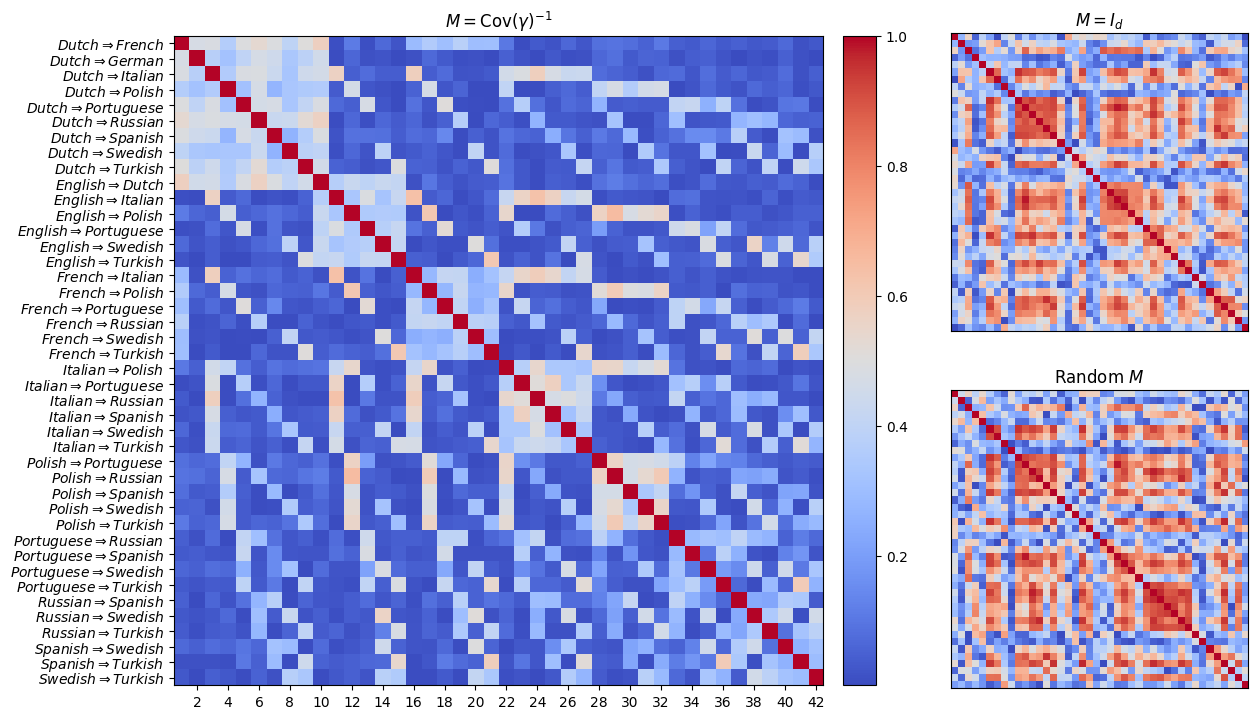

In [23]:
draw_heatmaps([torch.abs(g_cosines).cpu().detach().numpy(),
                    torch.abs(gamma_cosines).cpu().detach().numpy(),
                    torch.abs(another_g_cosines).cpu().detach().numpy()],
                    concept_labels = concept_names,
                    cmap = "coolwarm")

In [29]:
np_g_cosines = g_cosines.detach().numpy()

In [30]:
import pandas as pd


df = pd.DataFrame (np_g_cosines)
filepath = 'cosine_sims.xlsx'

df.to_excel(filepath, index=False)